## Data Industry Jobs And Salaries


### 1 Problem Statement
This project aims to analyze how salaries in the data industry are influenced by various factors, including company size, location, job category, and more.

### 2 Data Collection
The dataset used for this analysis is sourced from Kaggle and can be found at [Jobs and Salaries in Data Field 2024](https://www.kaggle.com/datasets/murilozangari/jobs-and-salaries-in-data-field-2024/data). The original data comes from [AI-Jobs.net](https://ai-jobs.net/salaries/2024/).

#### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warnings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/jobs_in_data_2024.csv')

Show Top 5 Records

In [27]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,work_setting,company_location,company_size,job_category
0,2024,Entry-level,Freelance,Applied Data Scientist,30000,USD,30000,United Kingdom,Remote,United Kingdom,M,Data Science and Research
1,2024,Executive,Full-time,Business Intelligence,230000,USD,230000,United States,In-person,United States,M,BI and Visualization
2,2024,Executive,Full-time,Business Intelligence,176900,USD,176900,United States,In-person,United States,M,BI and Visualization
3,2024,Senior,Full-time,Data Architect,171210,USD,171210,Canada,In-person,Canada,M,Data Architecture and Modeling
4,2024,Senior,Full-time,Data Architect,92190,USD,92190,Canada,In-person,Canada,M,Data Architecture and Modeling


Shape of the dataset

In [28]:
df.shape

(14199, 12)

The dataset consists of 14199 rows and 12 columns.

#### 2.2 Dataset information

In [4]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'work_setting', 'company_location', 'company_size', 'job_category'],
      dtype='object')

- <b>work_year:</b> The year in which the data was recorded. This field indicates the temporal context of the data, important for understanding salary trends over time.

- <b>job_title:</b> The specific title of the job role, like 'Data Scientist', 'Data Engineer', or 'Data Analyst'. This column is crucial for understanding the salary distribution across various specialized roles within the data field.

- <b>job_category:</b> A classification of the job role into broader categories for easier analysis. This might include areas like 'Data Analysis', 'Machine Learning', 'Data Engineering', etc.

- <b>salary_currency:</b> The currency in which the salary is paid, such as USD, EUR, etc. This is important for currency conversion and understanding the actual value of the salary in a global context.

- <b>salary:</b> The annual gross salary of the role in the local currency. This raw salary figure is key for direct regional salary comparisons.

- <b>salary_in_usd:</b> The annual gross salary converted to United States Dollars (USD). This uniform currency conversion aids in global salary comparisons and analyses.

- <b>employee_residence:</b> The country of residence of the employee. This data point can be used to explore geographical salary differences and cost-of-living variations.

- <b>experience_level:</b> Classifies the professional experience level of the employee. Common categories might include 'Entry-level', 'Mid-level', 'Senior', and 'Executive', providing insight into how experience influences salary in data-related roles.

- <b>employment_type:</b> Specifies the type of employment, such as 'Full-time', 'Part-time', 'Contract', etc. This helps in analyzing how different employment arrangements affect salary structures.

- <b>work_setting:</b> The work setting or environment, like 'Remote', 'In-person', or 'Hybrid'. This column reflects the impact of work settings on salary levels in the data industry.

- <b>company_location:</b> The country where the company is located. It helps in analyzing how the location of the company affects salary structures.

- <b>company_size:</b> The size of the employer company, often categorized into small (S), medium (M), and large (L) sizes. This allows for analysis of how company size influences salary.

### 3. Data Checks to Perform

- Verify data types
- Identify missing values
- Identify duplicates
- Review dataset statistics
- Examine categories across categorical columns

#### 3.1 Verify data types

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14199 entries, 0 to 14198
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           14199 non-null  int64 
 1   experience_level    14199 non-null  object
 2   employment_type     14199 non-null  object
 3   job_title           14199 non-null  object
 4   salary              14199 non-null  int64 
 5   salary_currency     14199 non-null  object
 6   salary_in_usd       14199 non-null  int64 
 7   employee_residence  14199 non-null  object
 8   work_setting        14199 non-null  object
 9   company_location    14199 non-null  object
 10  company_size        14199 non-null  object
 11  job_category        14199 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.3+ MB


In [24]:
numeric_features = df.select_dtypes(exclude='object').columns.tolist()
categorical_features = df.select_dtypes(include='object').columns.tolist()

print(f'We have {len(numeric_features)} numerical features: {numeric_features}')
print(f'\nWe have {len(categorical_features)} categorical features: {categorical_features}')

We have 2 numerical features: ['salary', 'salary_in_usd']

We have 10 categorical features: ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'work_setting', 'company_location', 'company_size', 'job_category']


#### 3.2 Identify missing values

In [6]:
df.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      0
company_size          0
job_category          0
dtype: int64

There are no missing values in the dataset.

#### 3.3 Identify Duplicates

In [33]:
print("duplicates: ", df.duplicated().sum())

duplicates:  5493


There are 5,493 duplicate entries. It's possible that these values are accurate, as two people from the same country with the same job position and salary could exist.

#### 3.4 Review dataset statistics

In [34]:
df.describe()

,work_year,salary,salary_in_usd
count,14199.000000,14199.000000,14199.00000
mean,2023.110501,149057.514262,149472.04944
std,0.686929,64932.044143,64379.26016
min,2020.000000,14000.000000,15000.00000
25%,2023.000000,102150.000000,104000.00000
50%,2023.000000,142000.000000,142000.00000
75%,2024.000000,185900.000000,185900.00000
max,2024.000000,450000.000000,450000.00000


##### Insights
- The mean salary is $149,472.05, with a standard deviation of $64,379.26.
- The minimum work_year value is 2020, and the maximum is 2024, indicating that the data spans these years.

Let's examine the distribution of work_year values:

In [8]:
df['work_year'].unique()

array([2024, 2023, 2022, 2020, 2021], dtype=int64)

In fact, the dataset covers the years 2020 to 2024. We will convert the data into categorical format to facilitate further analysis.

In [12]:
df['work_year'] = df['work_year'].map(lambda x: f'{x}')
print(df['work_year'].dtype)

object


Let's explore the correlation between salary_in_usd and salary, the only numerical features in the dataset.

In [17]:
numerical_features = df.select_dtypes(include='number')
numerical_features.corr()

,salary,salary_in_usd
salary,1.000000,0.993838
salary_in_usd,0.993838,1.000000


It's observed that salary_in_usd and salary exhibit a correlation coefficient of 0.99. This strong correlation suggests that salary_in_usd closely reflects salary values converted into US dollars, indicating a high degree of consistency or accuracy in the conversion process.

#### 3.5 Examine categories across categorical columns

In [20]:
unique_counts = {col: df[col].nunique() for col in df.columns[df.dtypes == 'object']}
for col, uniques in unique_counts.items():
    print(f'{col}: {df[col].unique()}')

work_year: ['2024' '2023' '2022' '2020' '2021']
experience_level: ['Entry-level' 'Executive' 'Senior' 'Mid-level']
employment_type: ['Freelance' 'Full-time' 'Contract' 'Part-time']
job_title: ['Applied Data Scientist' 'Business Intelligence' 'Data Architect'
 'Data Science' 'Insight Analyst' 'Data Engineer' 'Research Scientist'
 'Business Intelligence Analyst' 'Analytics Engineer' 'Data Scientist'
 'Research Engineer' 'BI Developer' 'Data Analyst'
 'Business Intelligence Engineer' 'Data Quality Engineer'
 'Machine Learning Engineer' 'Cloud Database Engineer' 'Head of Data'
 'BI Analyst' 'Data Manager' 'Computational Biologist'
 'Data Integration Specialist' 'Data Science Manager' 'AI Engineer'
 'Applied Scientist' 'BI Data Analyst' 'AI Research Scientist'
 'MLOps Engineer' 'Research Analyst' 'Admin & Data Analyst'
 'Business Intelligence Manager' 'Data Developer' 'Prompt Engineer'
 'Data Specialist' 'Data Integration Engineer' 'Data Science Analyst'
 'Data Analytics Associate' 'Data Re

As we can see, we have various categories within the qualitative variables. Let's examine the exact counts:

In [21]:
for key, value in unique_counts.items():
    print(f"{key}: {value}")

work_year: 5
experience_level: 4
employment_type: 4
job_title: 149
salary_currency: 12
employee_residence: 86
work_setting: 3
company_location: 74
company_size: 3
job_category: 10


The features with the most distinct categories are job_title, employee_residence, and company_location. 

Let's explore the job_category feature to understand how different job_titles are grouped within it. 

In [9]:
grouped = df.groupby('job_category')['job_title'].unique()

# Print the different job titles for each job category
titles_sum = 0
for category, titles in grouped.items():
    titles_sum = titles_sum + len(titles)
    print(f"\nJob Category: {category} - count: {len(titles)}")
    for title in titles:
        print(f" - {title}")


Job Category: BI and Visualization - count: 13
 - Business Intelligence
 - Business Intelligence Analyst
 - BI Developer
 - Business Intelligence Engineer
 - BI Analyst
 - Business Intelligence Manager
 - Business Intelligence Developer
 - Business Intelligence Lead
 - Data Visualization Specialist
 - Business Intelligence Specialist
 - Data Visualization Engineer
 - Power BI Developer
 - Data Visualization Analyst

Job Category: Cloud and Database - count: 1
 - Cloud Database Engineer

Job Category: Data Analysis - count: 18
 - Insight Analyst
 - Data Analyst
 - BI Data Analyst
 - Admin & Data Analyst
 - Data Analytics Associate
 - Data Reporting Analyst
 - Data Analyst Lead
 - Business Data Analyst
 - Financial Data Analyst
 - Staff Data Analyst
 - Business Intelligence Data Analyst
 - Finance Data Analyst
 - Compliance Data Analyst
 - Product Data Analyst
 - Sales Data Analyst
 - Lead Data Analyst
 - Marketing Data Analyst
 - Principal Data Analyst

Job Category: Data Architecture 

In [10]:

print("titles sum: ", titles_sum)
print("uniques job_title", len(df['job_title'].unique())) 

titles sum:  149
uniques job_title 149


As observed, the job_titles are distributed across different job_categories without repetition. This is confirmed by the total sum of 149, which matches the number of unique values in the job_title column.

### 4. Exploring Data (Visualization)

#### 4.1 Univariate Analysis

First, let's examine the frequency of each category in columns that have 12 or fewer categories.

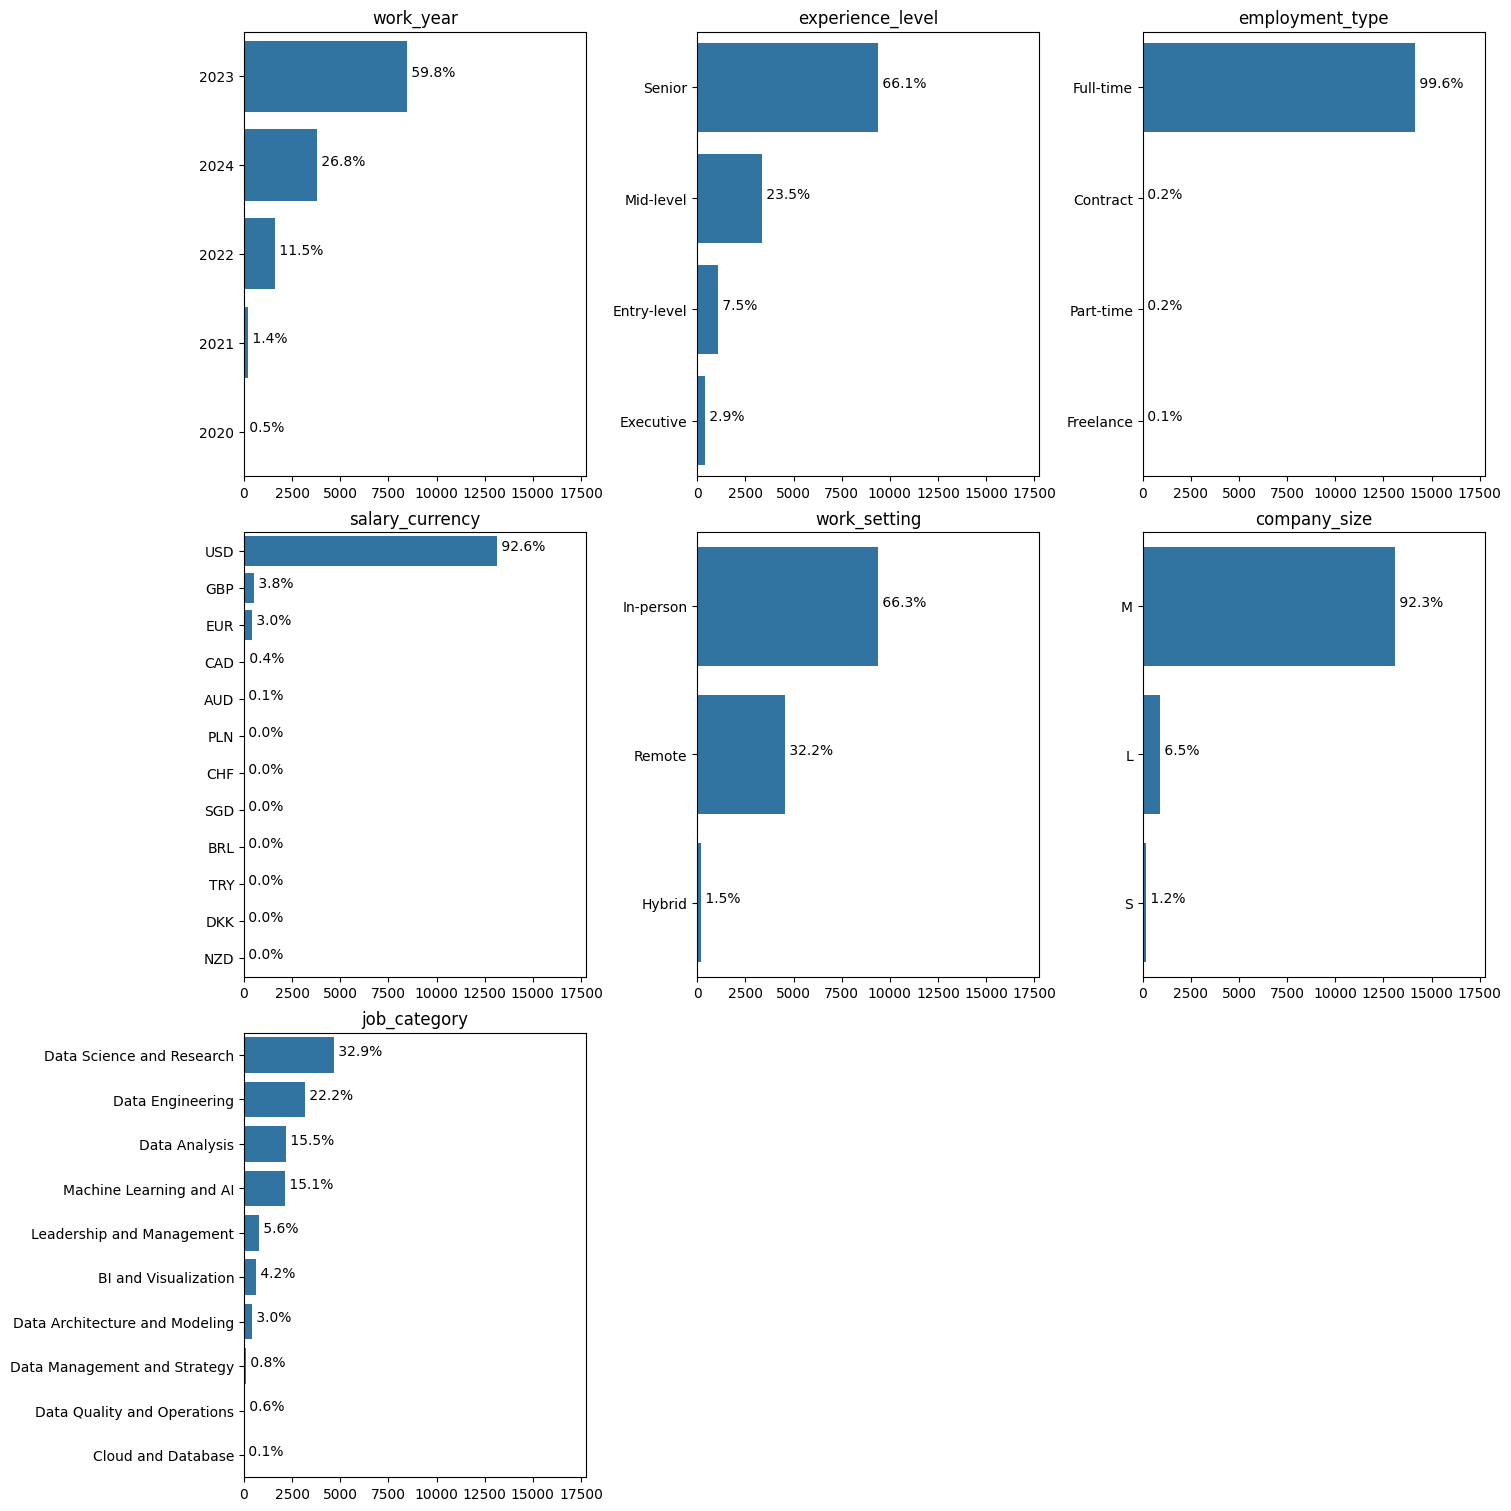

In [18]:
cat_attributes = df.select_dtypes(include='object')
columns = cat_attributes.columns.tolist()
columns = [column for column in columns if len(df[column].unique()) <= 12]

num_columns_in_grid = 3 
num_rows = (len(columns) + num_columns_in_grid - 1) // num_columns_in_grid

fig, axes = plt.subplots(num_rows, num_columns_in_grid, figsize=(15, 5 * num_rows), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(columns):
    ax = axes[i]
    
    sorted_data = cat_attributes[column].value_counts().sort_values(ascending=False)
    sns.barplot(y=sorted_data.index, x=sorted_data.values, ax=ax, orient='h')
    
    total = cat_attributes[column].size
    for p in ax.patches:
        percentage = ' {:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_x() + p.get_width() + 0.01
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percentage, (x, y))
    
    ax.set_xlim(0, total * 1.25)  # Adiciona um pouco de espaço extra à direita
    ax.set_title(column) 
    ax.set_ylabel("") 

# Remove subplots vazios
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.ylabel("")
plt.show()

##### Insights

- Approximately 86.6% of the data is from 2023 and 2024.
- Two-thirds of the data represents senior-level employees.
- Nearly all data entries are from full-time contracts.
- About two-thirds of the data corresponds to in-person work settings, while one-third corresponds to remote settings; hybrid settings make up only 1.5%.
- The majority of the data is from medium-sized companies.
- The most frequent job category is "Data Science and Research," followed by "Data Engineering," "Data Analysis," and "Machine Learning and AI." These four categories combined account for approximately 85% of the records.
- The majority of salaries are denominated in dollars.

Now, let's explore the frequency distributions of the three columns with more than 12 categories. To enhance visualization, we will focus on the top 20 most frequent categories, utilizing a helper function for this purpose.

In [23]:
def print_first_20_categories_percentage(column_name):
    frequency_table = Counter(df[column_name])
    total_count = sum(frequency_table.values())

    frequency_df = pd.DataFrame(frequency_table.items(), columns=[column_name, 'Percentage'])

    frequency_df['Percentage'] = (frequency_df['Percentage'] / total_count) * 100
    frequency_df = frequency_df.sort_values(by='Percentage', ascending=False)

    frequency_df['Percentage'] = frequency_df['Percentage'].map(lambda x: f'{x:.2f}%')
    
    print(frequency_df.head(20).to_string(index=False))

print_first_20_categories_percentage('job_title')

                     job_title Percentage
                 Data Engineer     21.54%
                Data Scientist     20.49%
                  Data Analyst     14.93%
     Machine Learning Engineer     10.48%
            Research Scientist      3.20%
            Analytics Engineer      2.75%
             Applied Scientist      2.60%
                Data Architect      2.44%
             Research Engineer      1.86%
Business Intelligence Engineer      1.54%
                  Data Science      1.30%
                  Data Manager      1.28%
                   ML Engineer      1.08%
 Business Intelligence Analyst      0.89%
    Machine Learning Scientist      0.78%
          Data Science Manager      0.76%
              Research Analyst      0.73%
                   AI Engineer      0.65%
                  BI Developer      0.58%
       Data Science Consultant      0.51%


In [99]:
print_first_20_categories_percentage('employee_residence')

employee_residence Percentage
     United States     87.46%
    United Kingdom      4.34%
            Canada      2.61%
             Spain      0.92%
           Germany      0.63%
            France      0.44%
         Australia      0.34%
          Portugal      0.21%
       Netherlands      0.20%
             India      0.15%
             Italy      0.15%
            Brazil      0.15%
            Greece      0.11%
         Lithuania      0.11%
          Colombia      0.11%
            Poland      0.11%
      South Africa      0.10%
            Latvia      0.10%
             Egypt      0.10%
           Ireland      0.08%


In [56]:
print_first_20_categories_percentage('company_location')

company_location Percentage
   United States     87.79%
  United Kingdom      4.39%
          Canada      2.63%
           Spain      0.89%
         Germany      0.68%
          France      0.42%
       Australia      0.36%
        Portugal      0.20%
     Netherlands      0.20%
          Brazil      0.13%
       Lithuania      0.11%
        Colombia      0.11%
    South Africa      0.10%
           Italy      0.10%
          Latvia      0.10%
          Greece      0.10%
          Poland      0.10%
           India      0.09%
          Mexico      0.09%
           Egypt      0.09%


##### Insights

- The most frequent job titles are Data Engineer, Data Scientist, Data Analyst, and Machine Learning Engineer.
- There is a significant imbalance within the columns for company location and employee residence. The majority of records are from the United States, followed by the United Kingdom and Canada. All other countries each represent less than 1% of the data, indicating a high concentration of records in a few countries.

#### 4.2 Multivariate Analysis

Next, we will calculate the mean and median salary values across different feature categories. We will start with features that have 12 or fewer categories.

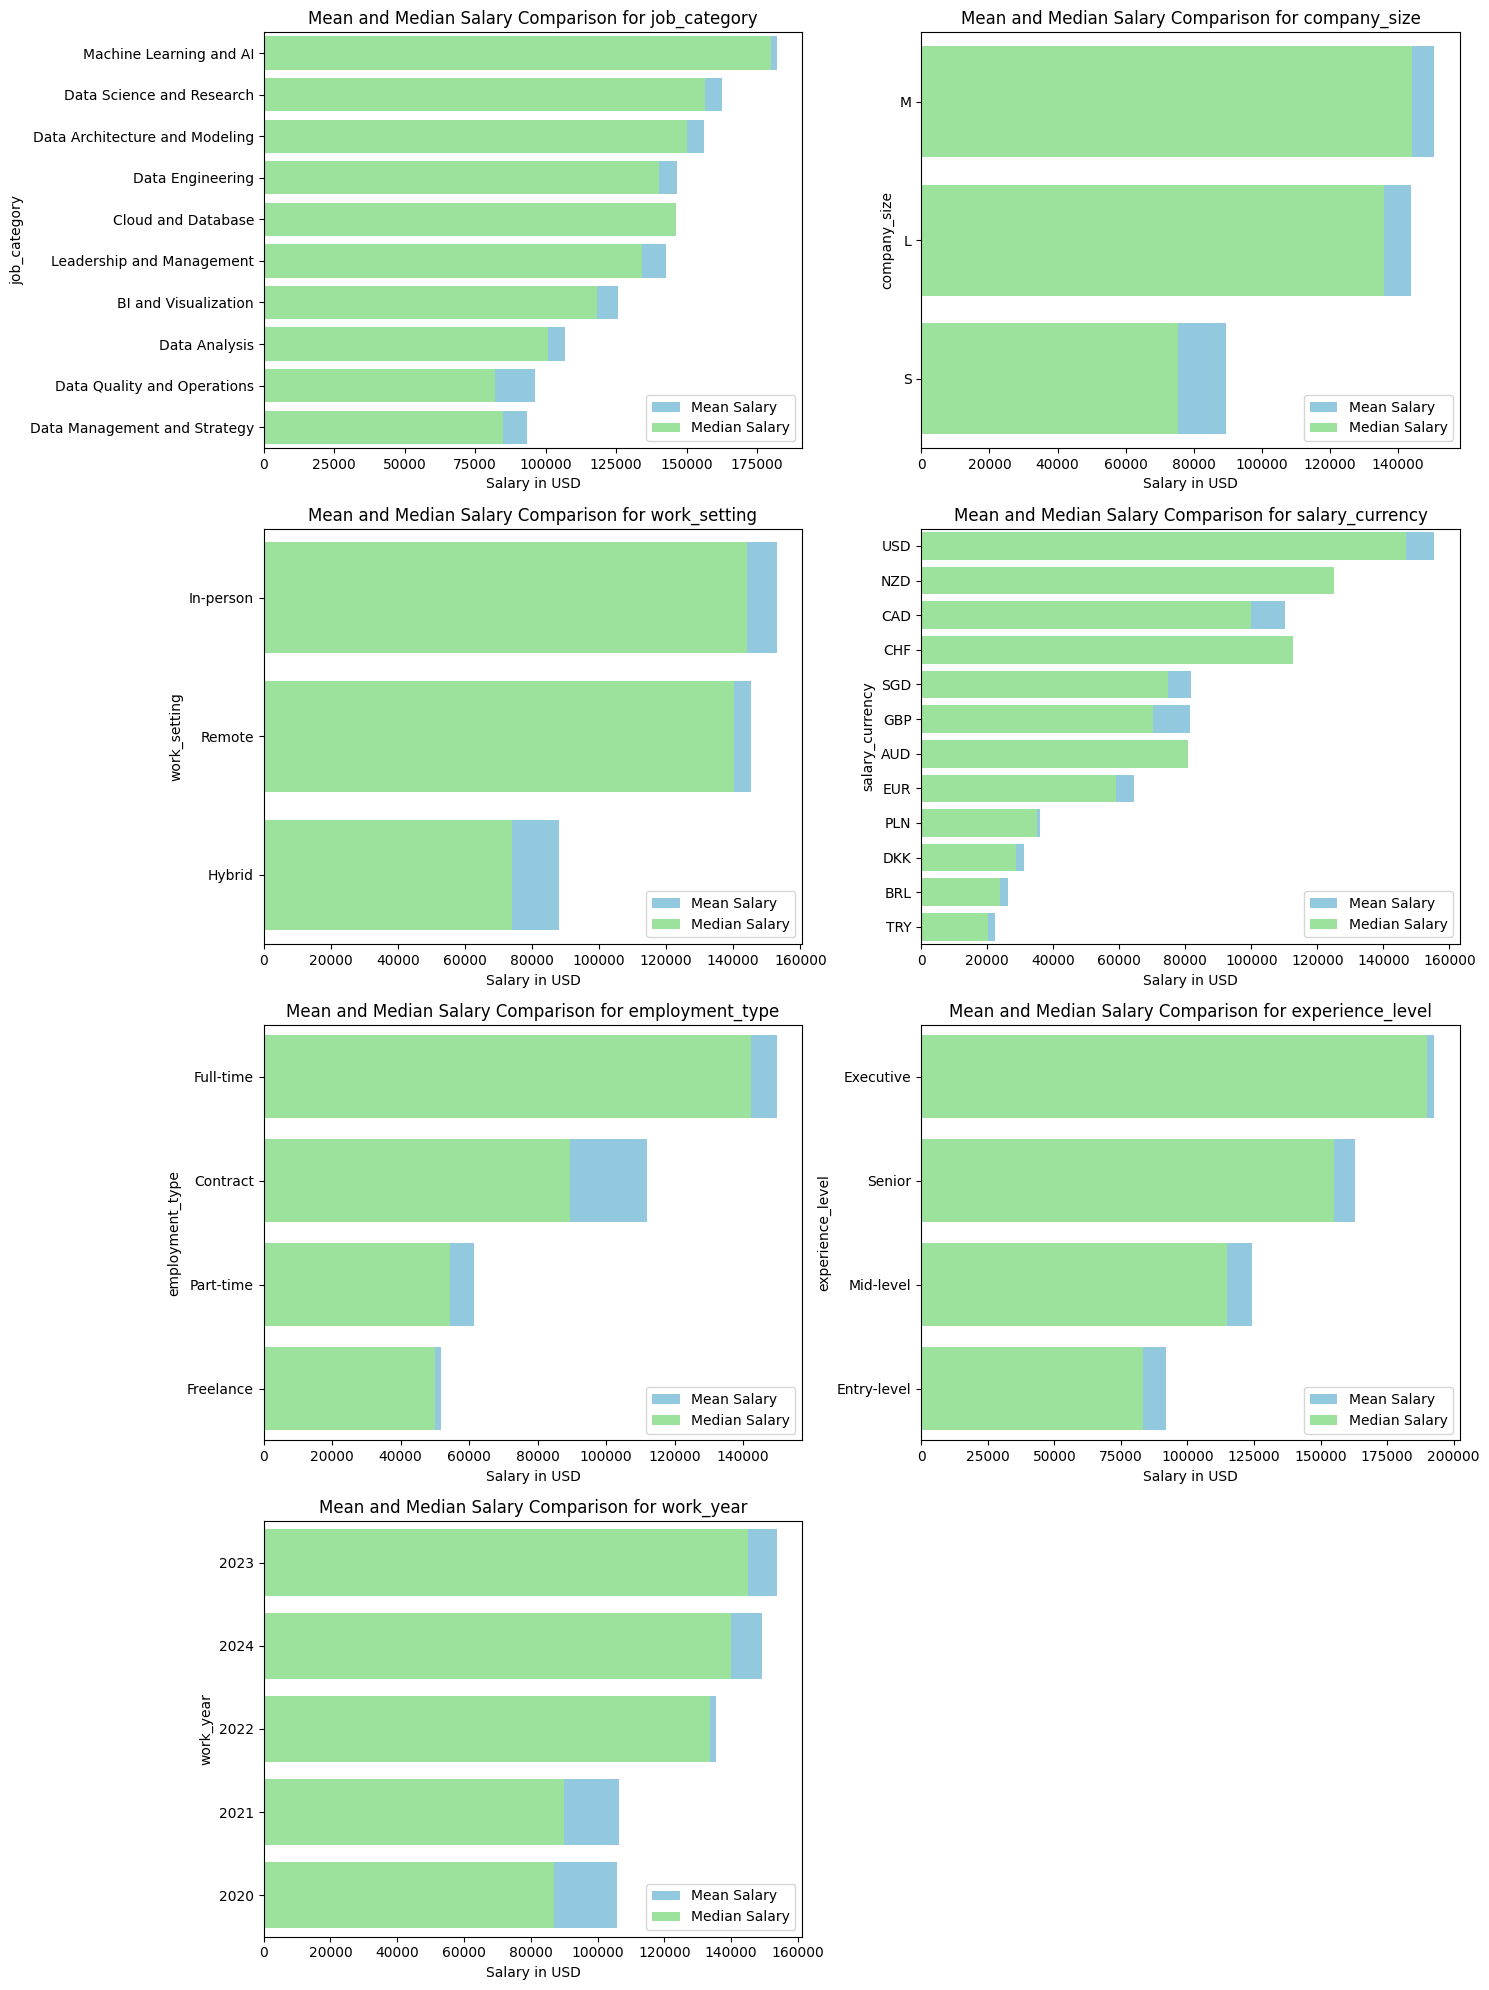

In [19]:
cat_attributes = df.select_dtypes(include='object')
columns = cat_attributes.columns.tolist()
columns = [column for column in columns if len(df[column].unique()) <= 12]

num_columns_in_grid = 2
num_rows = (len(columns) + num_columns_in_grid - 1) // num_columns_in_grid

summary_df = pd.DataFrame(columns=['Category', 'Mean Salary in USD', 'Median Salary in USD'])

fig, axes = plt.subplots(num_rows, num_columns_in_grid, figsize=(15, 5 * num_rows), constrained_layout=True)
axes = axes.flatten()

for i, column in enumerate(reversed(columns)):
    ax = axes[i]
    
    category_summary = df.groupby(column)['salary_in_usd'].agg(['mean', 'median'])
    category_summary.reset_index(inplace=True)
    category_summary.columns = ['Category', 'Mean Salary in USD', 'Median Salary in USD']
    category_summary.sort_values(by='Mean Salary in USD', ascending=False, inplace=True)
    
    sns.barplot(x='Mean Salary in USD', y='Category', data=category_summary, color='skyblue', ax=ax, label='Mean Salary')
    sns.barplot(x='Median Salary in USD', y='Category', data=category_summary, color='lightgreen', ax=ax, label='Median Salary')

    ax.set_xlabel('Salary in USD')
    ax.set_ylabel(column)
    ax.set_title(f'Mean and Median Salary Comparison for {column}')
    ax.legend()

# Remove subplots vazios
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

##### Insights

- The job category that pays the highest salary in USD, considering both mean and median values, is Machine Learning and AI.
- Medium-sized companies, on average, pay slightly more than large-sized companies. Small-sized companies pay the least.
- In-person work pays more, on average, than remote work, but both tend to pay more than hybrid work.
- Full-time contracts are the employment type that pays the highest salaries on average.
- As expected, there is a relationship between experience level and salaries, with higher salaries going to workers with more experience.
- There was a significant increase in salaries from 2021 to 2022, continuing into 2023. However, data from 2024 suggests a slight decrease.

We'll define a helper function to display the top 20 mean and median values for features with more than 12 categories.

In [101]:
def print_highest_20_categories_mean_and_median(column_name):
    summary = df.groupby(column_name)['salary_in_usd'].agg(['mean', 'median'])
    summary.reset_index(inplace=True)

    summary.columns = ['Category', 'Mean Salary', 'Median Salary']
    summary.sort_values(by='Mean Salary', ascending=False, inplace=True)
    
    summary["Mean Salary"] = summary['Mean Salary'].map(lambda x: f'{x:.2f}')
    summary["Median Salary"] = summary['Median Salary'].map(lambda x: f'{x:.2f}')

    print(summary.head(20).to_string(index=False))

print_highest_20_categories_mean_and_median("job_title")

                          Category Mean Salary Median Salary
     Analytics Engineering Manager   399880.00     399880.00
            Data Science Tech Lead   375000.00     375000.00
          Head of Machine Learning   337000.00     351500.00
    Managing Director Data Science   280000.00     280000.00
                AWS Data Architect   258000.00     258000.00
              Cloud Data Architect   250000.00     250000.00
                      AI Architect   229721.13     204000.00
          Director of Data Science   218775.33     217000.00
Machine Learning Software Engineer   212907.69     189000.00
               Data Analytics Lead   208873.18     166000.00
                      Head of Data   208790.89     215000.00
      Data Infrastructure Engineer   207332.81     184500.00
                       ML Engineer   197927.85     188200.00
              Data Science Manager   197123.41     190000.00
        Robotics Software Engineer   196625.00     193000.00
          Principal Data

In [77]:
print_highest_20_categories_mean_and_median("employee_residence")

                 Category Mean Salary Median Salary
                    Qatar   300000.00     300000.00
                 Malaysia   200000.00     200000.00
              Puerto Rico   166000.00     160000.00
            United States   156807.40     148800.00
              New Zealand   147681.67     130710.00
                   Canada   145424.65     140000.00
             Saudi Arabia   139999.33     150000.00
                    Egypt   135807.14      99750.00
                    Japan   135500.00     121000.00
                Australia   133918.42     105600.00
                    China   125404.00     125404.00
       Dominican Republic   110000.00     110000.00
              Switzerland   106307.00     112549.50
                   Sweden   105000.00     105000.00
                    Chile   105000.00     105000.00
                  Ireland   104694.92      98585.50
                     Iraq   100000.00     100000.00
Iran, Islamic Republic of   100000.00     100000.00
            

In [78]:
print_highest_20_categories_mean_and_median("company_location")

                 Category Mean Salary Median Salary
                    Qatar   300000.00     300000.00
              Puerto Rico   167500.00     167500.00
                    Japan   165500.00     164000.00
            United States   156525.77     148300.00
              New Zealand   147681.67     130710.00
                   Canada   144921.63     140000.00
                    Egypt   140869.23     106200.00
             Saudi Arabia   139999.33     150000.00
                Australia   131204.88     105000.00
                   Israel   117029.50     117029.50
              Switzerland   106307.00     112549.50
                  Ukraine   105600.00      84000.00
                  Ireland   104694.92      98585.50
                Mauritius   100000.00     100000.00
                     Iraq   100000.00     100000.00
Iran, Islamic Republic of   100000.00     100000.00
                  Algeria   100000.00     100000.00
                    China   100000.00     100000.00
            

#####  Insights
- The top-paying job titles, on average, include Analytics Engineering Manager, Data Science Tech Lead, Head of Machine Learning, and Managing Director Data Science — all of which are managerial roles.
- Qatar offers the highest average salaries, while the United States ranks fourth, whether considering company location or employee residence.

#### 4.3 Outliers

First, let's determine the number of outliers based on salary in USD.

Number of outliers: 261


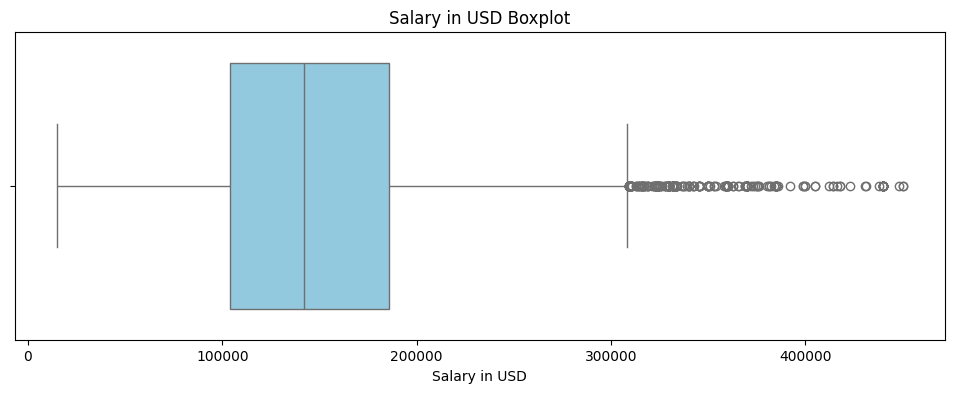

In [3]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['salary_in_usd'] < lower_bound) | (df['salary_in_usd'] > upper_bound)]
num_outliers = outliers.shape[0]

print(f'Number of outliers: {num_outliers}')

plt.figure(figsize=(12, 4))
sns.boxplot(x=df['salary_in_usd'], color='skyblue')
plt.title('Salary in USD Boxplot')
plt.xlabel('Salary in USD')
plt.show()


Note that there are outliers in the salary data, all of which exceed the upper bound; there are no lower outliers.

Next, let's examine the distribution of outliers across feature categories. We'll define a function to assist with this analysis.

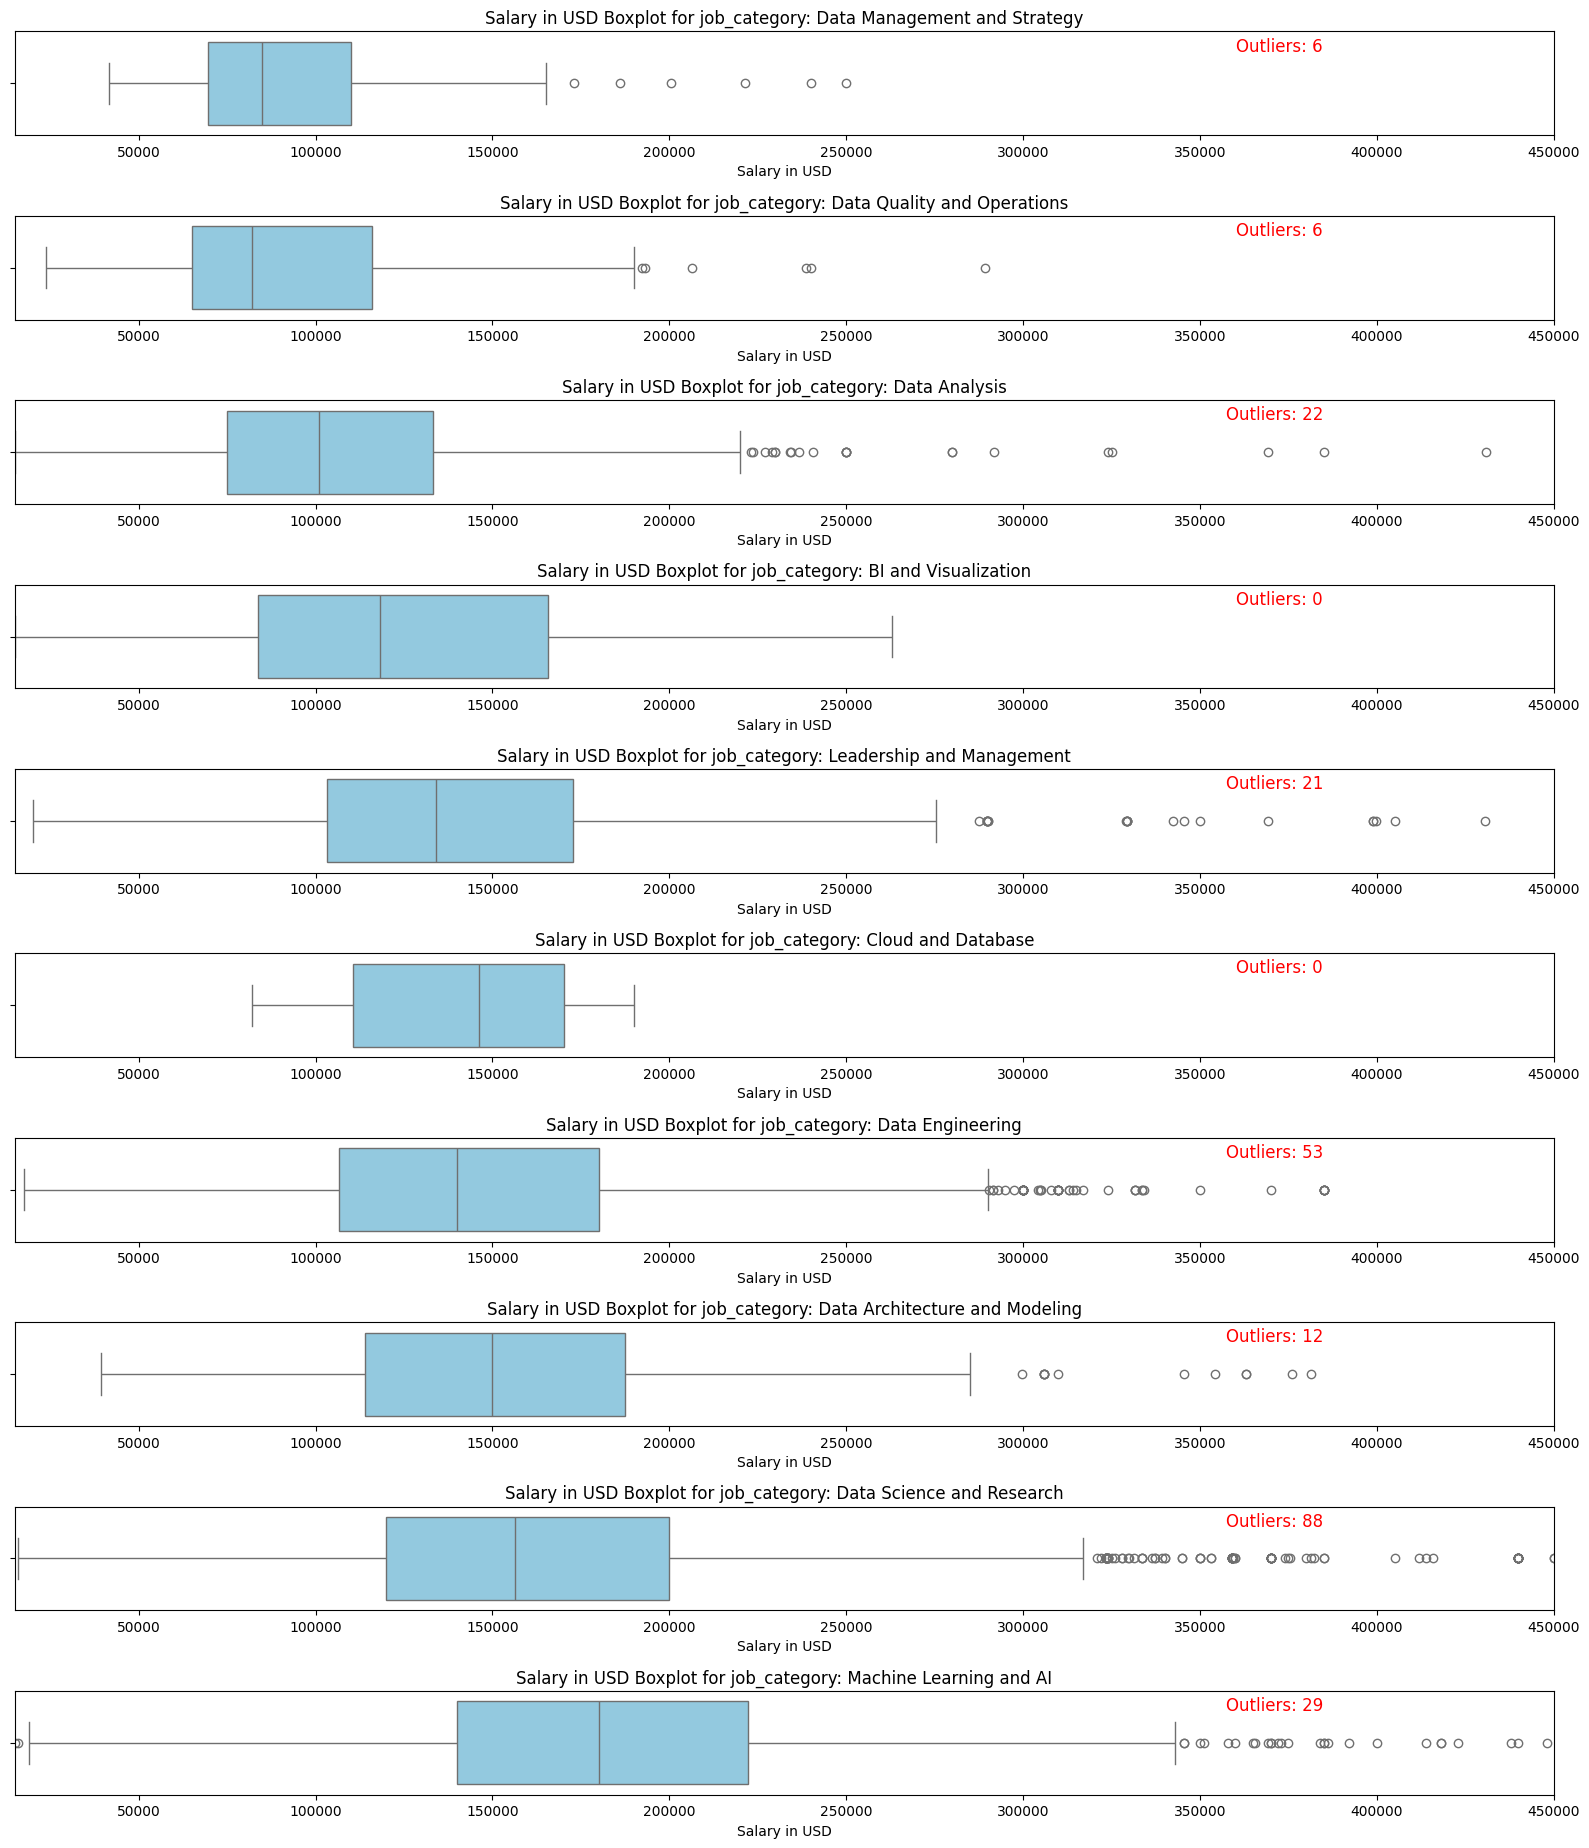

In [21]:
def boxplot_by_salary_for_each_category(column_name):
    category_means = df.groupby(column_name)['salary_in_usd'].mean().sort_values()
    sorted_categories = category_means.index
    
    num_categories = len(sorted_categories)
    
    num_cols = 1
    num_rows = (num_categories + 1) // num_cols
    
    global_min = df['salary_in_usd'].min()
    global_max = df['salary_in_usd'].max()
    
    plt.figure(figsize=(16, 2 * num_categories))


    for i, category in enumerate(sorted_categories):
        df_salary_category = df[df[column_name] == category]['salary_in_usd']

        plt.subplot(num_rows, num_cols, i + 1)
        sns.boxplot(x=df_salary_category, color='skyblue')
        plt.title(f'Salary in USD Boxplot for {column_name}: {category}')
        plt.xlabel('Salary in USD')
        plt.xlim(global_min, global_max)

        Q1 = df_salary_category.quantile(0.25)
        Q3 = df_salary_category.quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df_salary_category[(df_salary_category < lower_bound) | (df_salary_category > upper_bound)]
        num_outliers = outliers.shape[0]

        plt.text(x=0.85, y=0.95, s=f'Outliers: {num_outliers}', 
                 horizontalalignment='right', verticalalignment='top', 
                 transform=plt.gca().transAxes, fontsize=12, color='red')  

    plt.tight_layout()
    plt.show()

boxplot_by_salary_for_each_category('job_category')

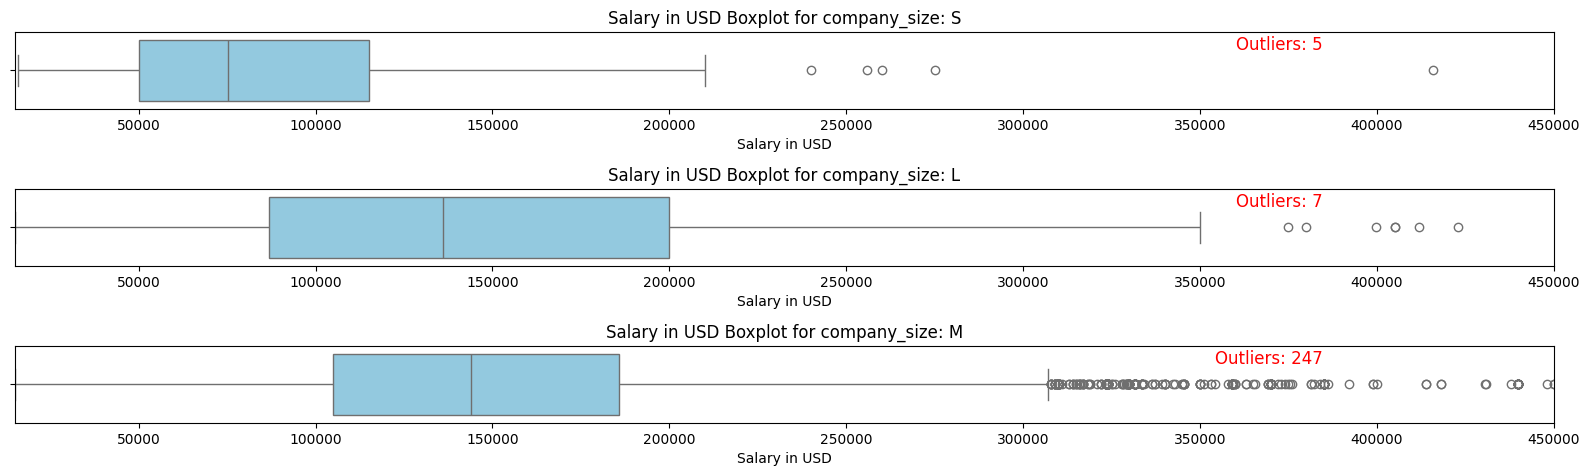

In [11]:
boxplot_by_salary_for_each_category('company_size')

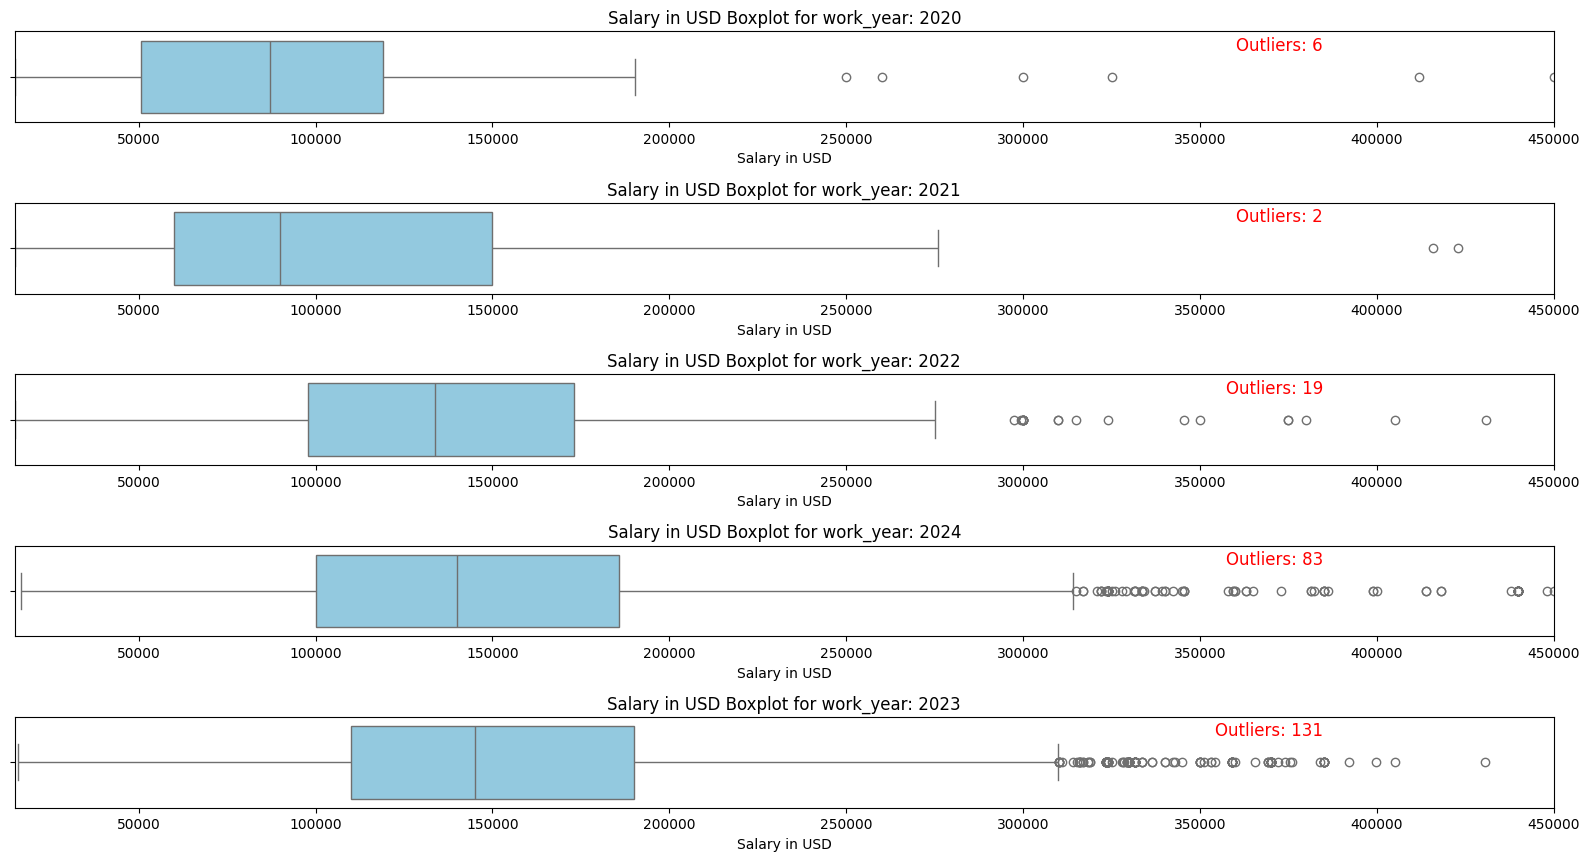

In [12]:
boxplot_by_salary_for_each_category('work_year')

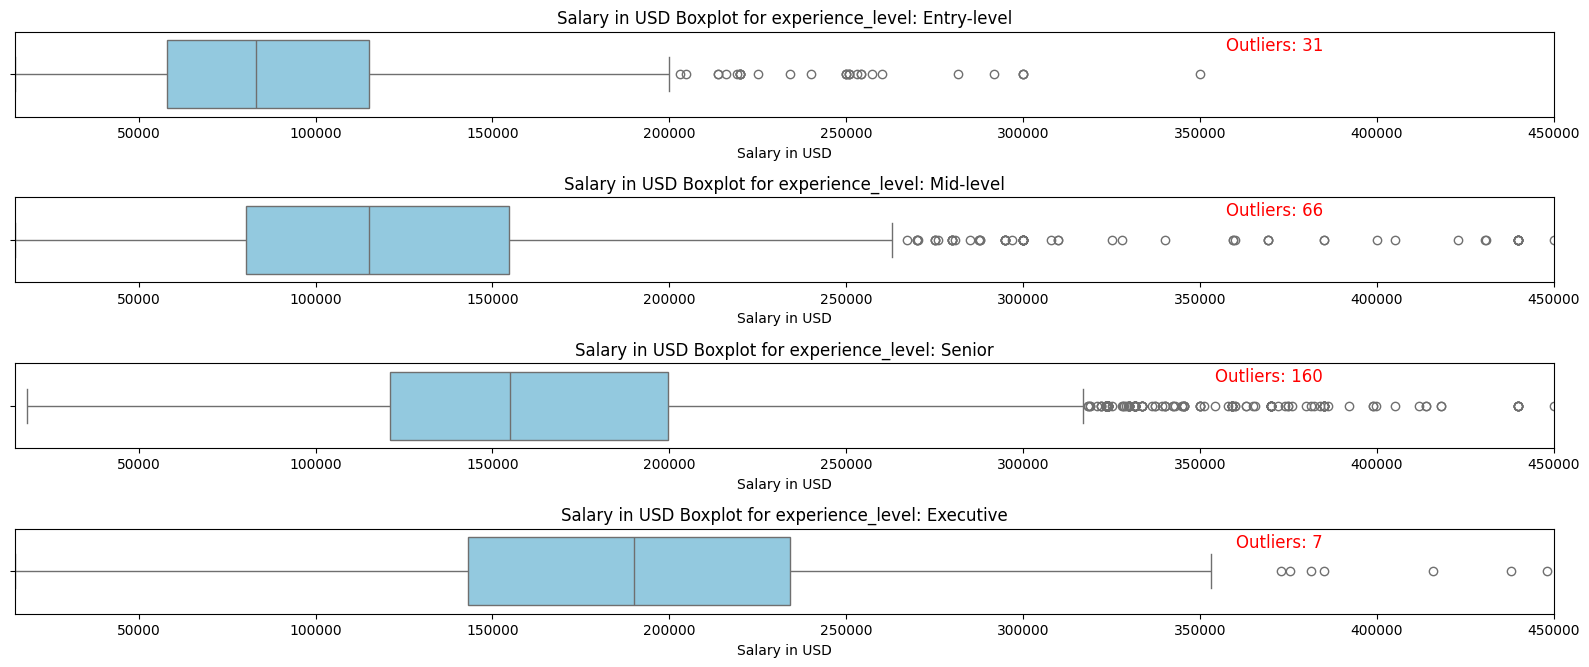

In [13]:
boxplot_by_salary_for_each_category('experience_level')

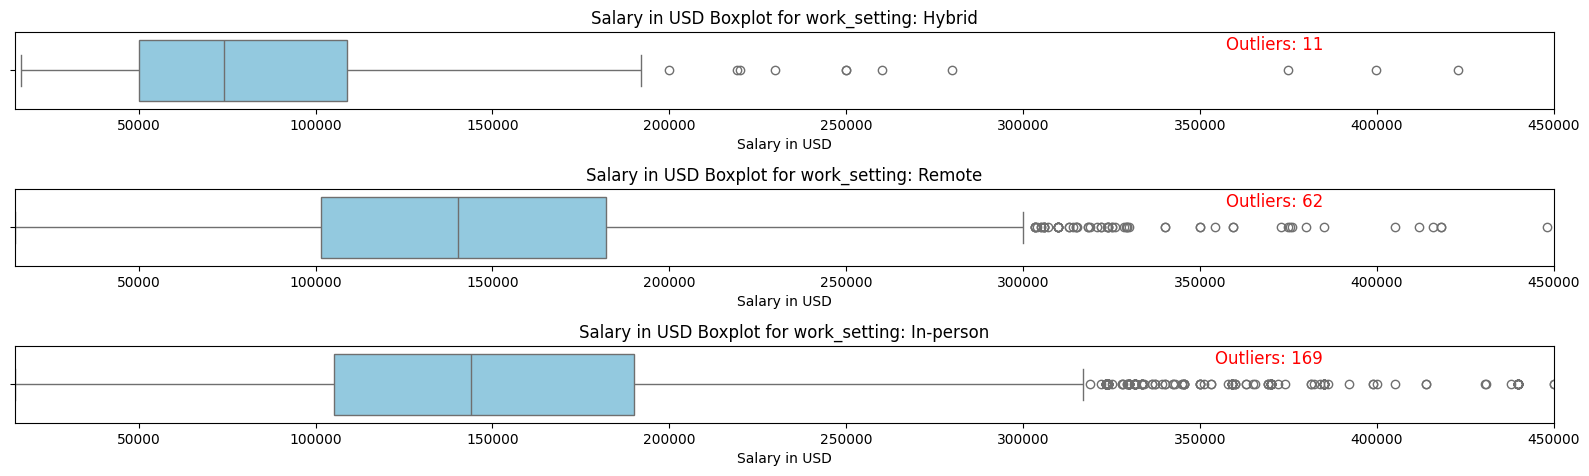

In [15]:
boxplot_by_salary_for_each_category('work_setting')

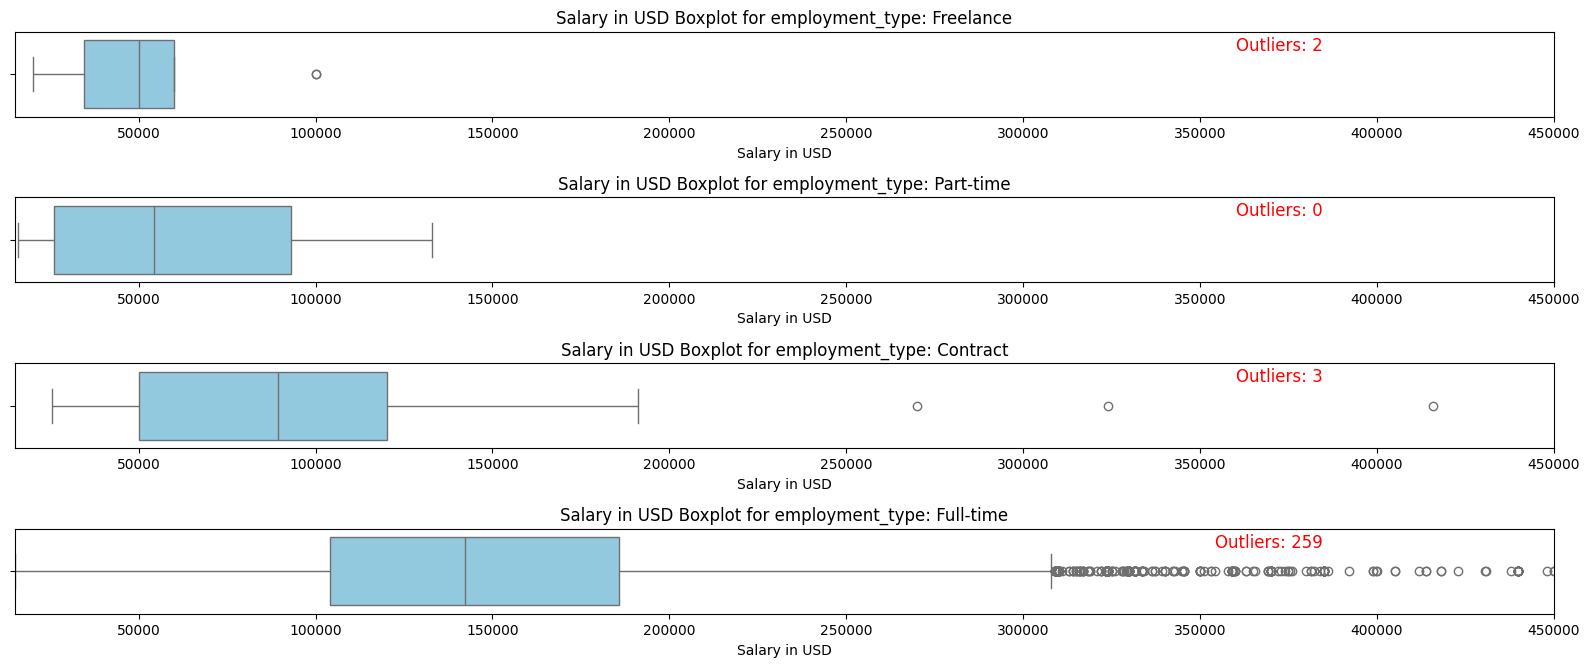

In [16]:
boxplot_by_salary_for_each_category('employment_type')

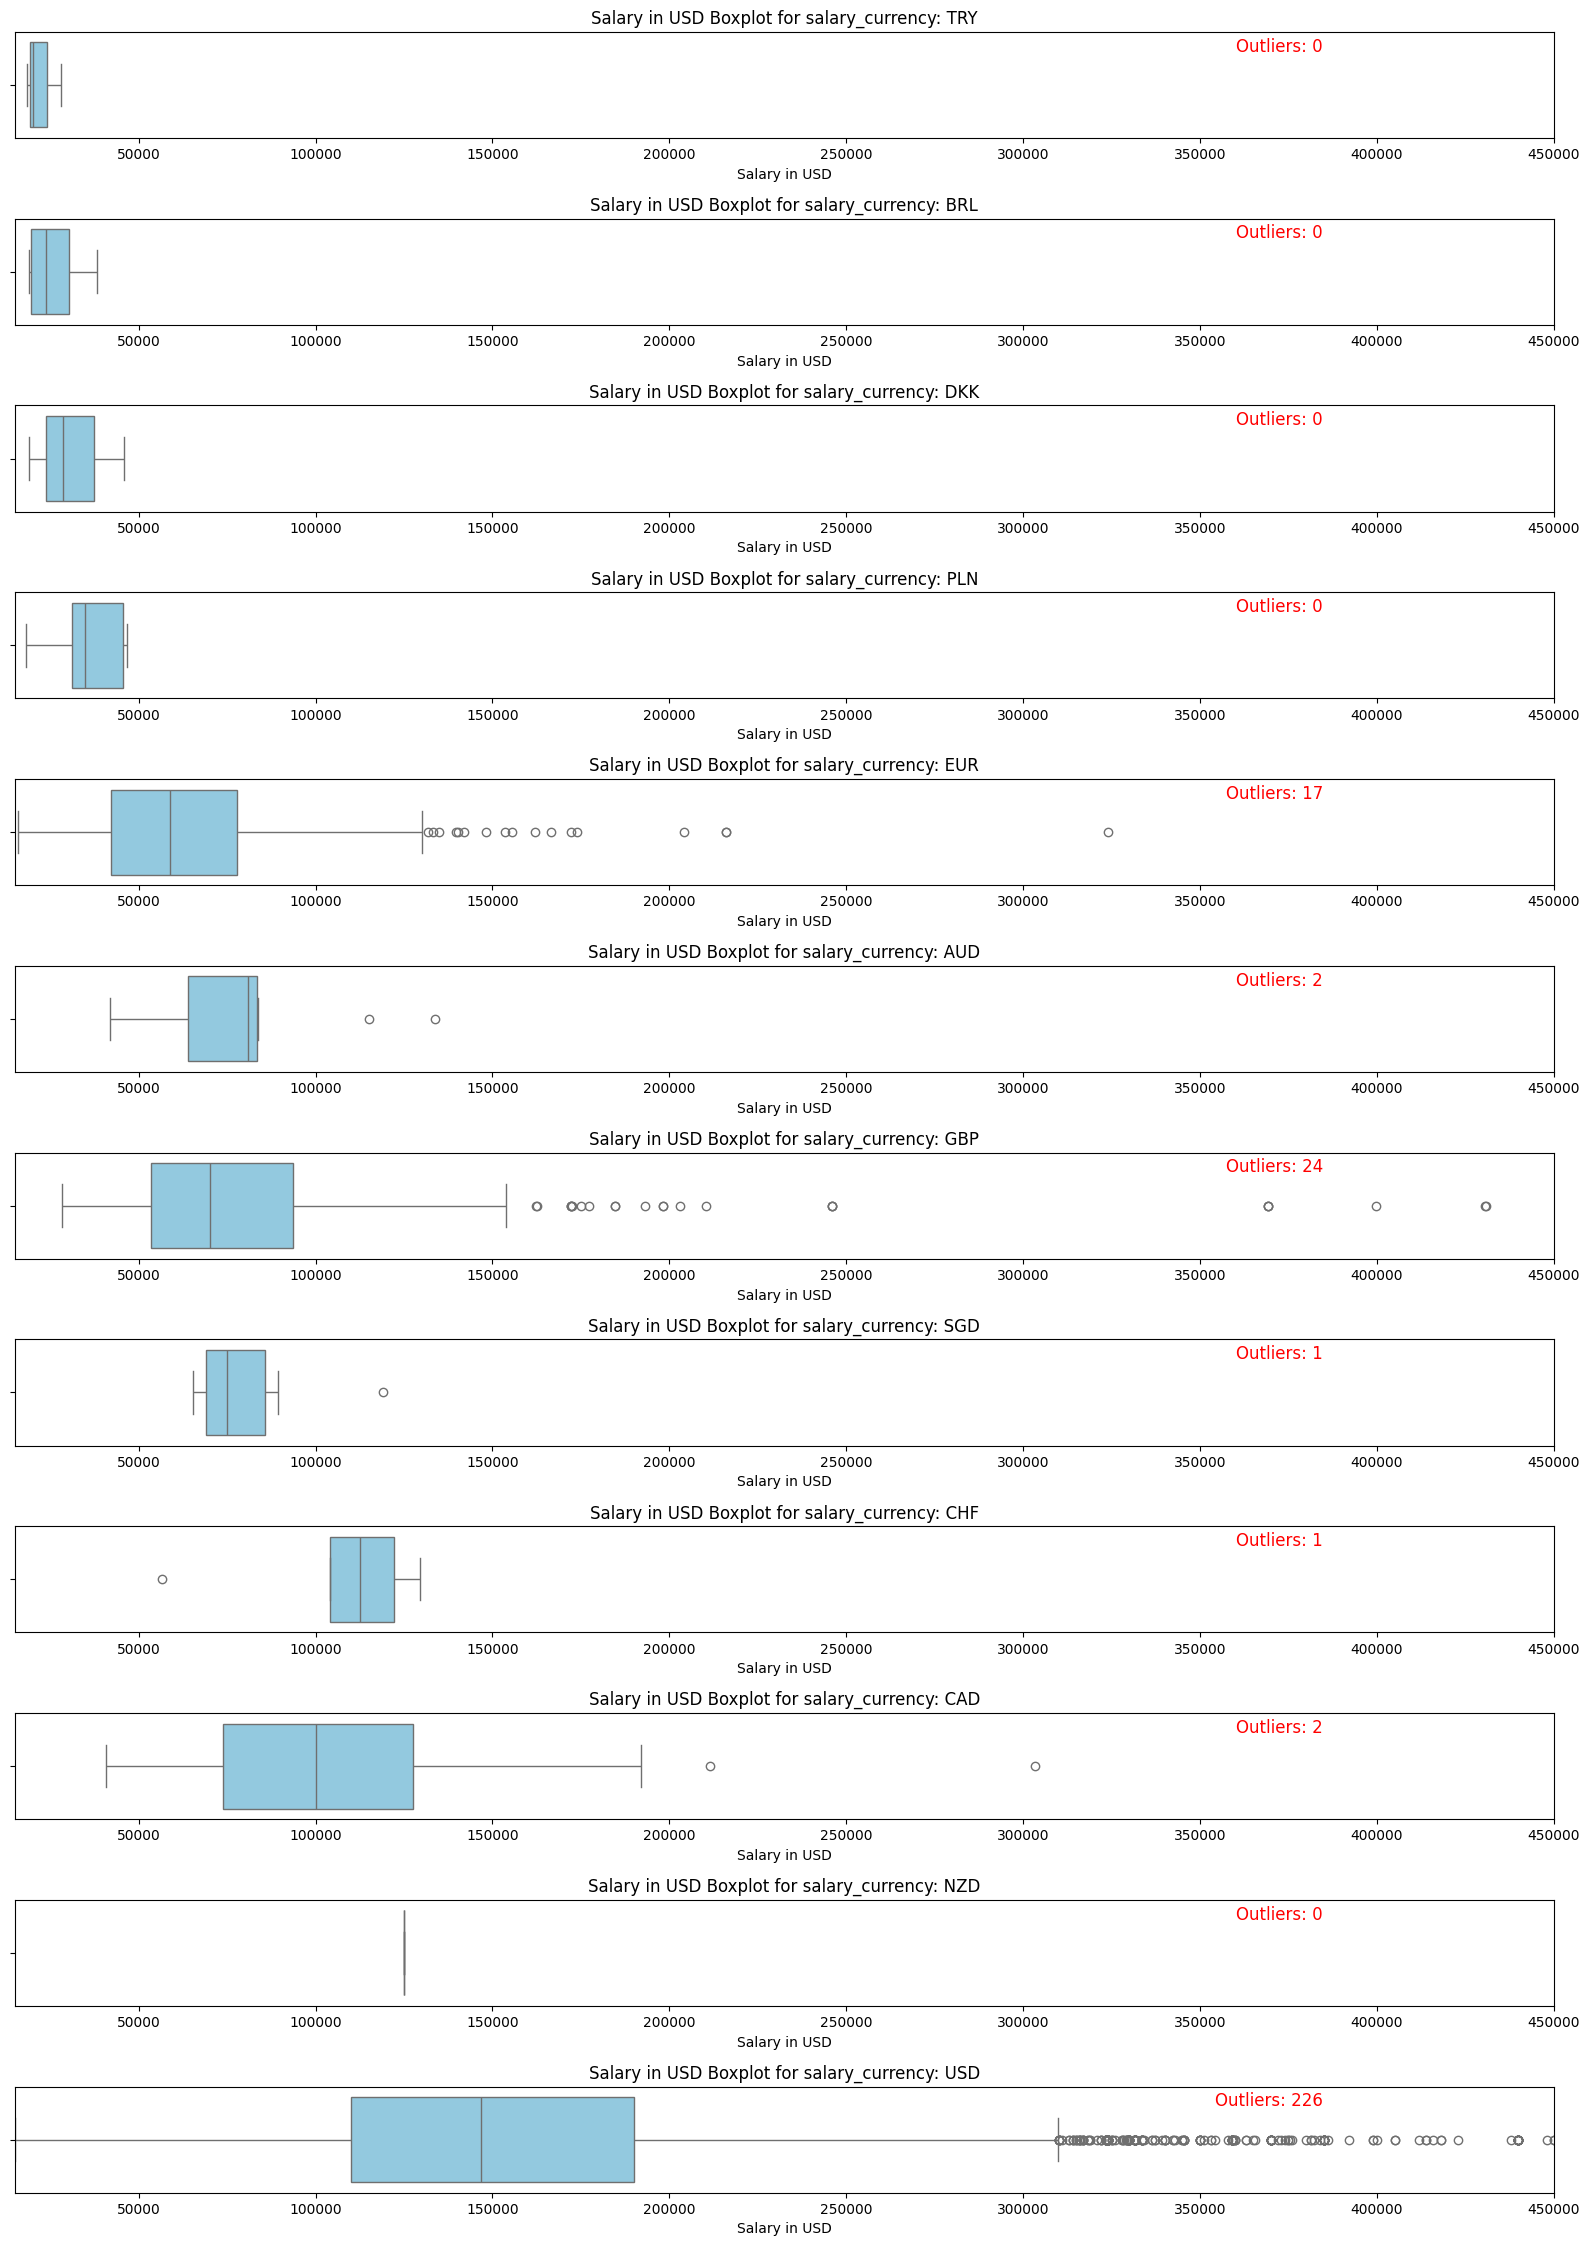

In [22]:
boxplot_by_salary_for_each_category('salary_currency')

##### Insights

- Medium-sized companies have the highest number of outliers in salary payments.
- Across feature categories, only upper outliers are present.

### 5. Conclusions

- Job salary is related to experience level, job title/category, employment type, work setting, company size, location, and employee residence.
- Higher salaries are found in:
  - Executive experience level
  - Full-time contracts
  - In-person work settings
  - Medium to large-sized companies
- The job category "Machine Learning and AI" pays the most.

### 6. Further Analysis

Further analysis could involve exploring how multiple variables interact with the salary variable. For instance, examining how salaries vary across different experience levels within various job categories or countries, or investigating the relationship between work settings (remote versus in-person) and salary across different company sizes.

Additionally, statistical tests could be applied to verify if there are significant differences in salary between specific job categories or other relevant comparisons.

Also, test if the company location is related with the salary currency.